Step 1: Import the data to clean

In [2]:
# package for data retriving
import requests
from io import StringIO

In [3]:
# package for data processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

In [4]:
# data was pull via kaggle api
# there is not such a web rest api from kaggle to read .csv via link directly without authentication
# so it was host on google drive currently for project purpose solely

host_url = "https://drive.google.com/file/d/10-7rnouldSpZlN22zsvwYlC487UNI8i8/view?usp=sharing"
download_url = 'https://drive.google.com/uc?export=download&id='+ host_url.split('/')[-2]

req_url = requests.get(download_url).text
csv_raw = StringIO(req_url)

## originally = 7787 observations
df = pd.read_csv(csv_raw)

## keeping the raw data as copy
df_raw = df.copy()

Step 2: Clean up

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
## dropped these two columns - director, cast 
## becuase it's unnessary for analyst and large amount of missing values.
df = df.drop(['director','cast'], axis = 1, errors='ignore')

In [7]:
## there were ony 7 missing values of ratings - 
## small sample size 0.001% simply dropped those 7
df=df[df["rating"].notna()]

In [8]:
## there were 10 missing values for date_added - dropped those 10
df=df[df["date_added"].notna()]

In [9]:
df.isna().sum()

show_id           0
type              0
title             0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [10]:
# there were 505 missing values for country - dropped those 505
# df=df[df["country"].notna()]
# df

In [11]:
## now there is no more missing values - ending with 7265 observations
df.isna().sum()

show_id           0
type              0
title             0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [12]:
#standardlize rating and title column
df['title'] = df['title'].str.upper()
df['rating'] = df['rating'].str.upper()

# instead of removing, replace the country Nan with unknown
df['country'] = df['country'].fillna('unknown')
df['country'] = df['country'].str.upper()

Raw data before cleaning

In [13]:
len(df_raw.index)

7787

Total data after cleaning

In [14]:
len(df.index)

7770

Step 3: Statistical analysis & Step 4: Visualization

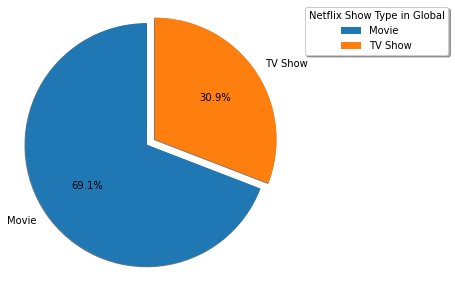

In [15]:
def create_type_pie(vc, title="Type"):
    t_fig, t_ax = plt.subplots(figsize=(5, 5))
    explode = [0.2]* len(vc)
    t_ax.pie(vc.values, explode=explode, labels=vc.index, autopct='%1.1f%%',
            shadow=True, startangle=90, radius= 5)

    t_ax.legend(title=title,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0, shadow=True)
    t_ax.axis('equal')
    plt.show()

type_vc = df['type'].value_counts()
create_type_pie(type_vc, 'Netflix Show Type in Global')

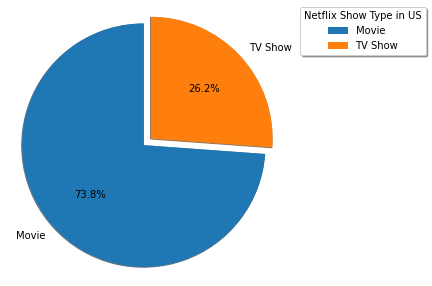

In [16]:
type_us = df[df['country'].str.contains("UNITED STATES")]
type_vc_us = type_us['type'].value_counts()
create_type_pie(type_vc_us, 'Netflix Show Type in US')

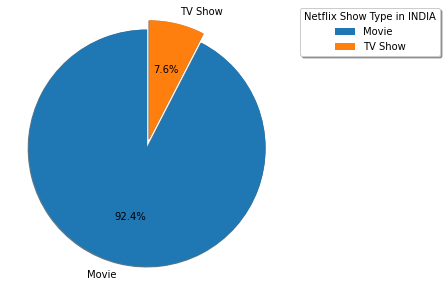

In [17]:
type_india = df[df['country'].str.contains("INDIA")]
type_vc_india = type_india['type'].value_counts()
create_type_pie(type_vc_india, 'Netflix Show Type in INDIA')